### 1.Import Data 

In [5]:
import pandas as pd
import numpy as np

In [6]:
ddf = pd.read_csv('Diagnosis.csv')
tdf=pd.read_csv('Treatment.csv')

### 2. Check dataframs information 

In [10]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PatientID          44 non-null     int64  
 1   DiagnosisDate      44 non-null     object 
 2   DiagnosisCode      44 non-null     float64
 3   Diagnosis          44 non-null     object 
 4   IsCancerDiagnosis  44 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 1.5+ KB


In [11]:
ddf.head()

,PatientID,DiagnosisDate,DiagnosisCode,Diagnosis,IsCancerDiagnosis
0,2634,2011-02-19,285.8,Anemia,False
1,5657,2012-06-07,285.8,Anemia,False
2,7937,2013-01-06,285.8,Anemia,False
3,8615,2013-07-18,284.9,Anemia,False
4,4354,2012-02-04,284.9,Anemia,False


In [12]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PatientID      714 non-null    int64 
 1   TreatmentDate  714 non-null    object
 2   DrugCode       714 non-null    object
dtypes: int64(1), object(2)
memory usage: 16.9+ KB


In [13]:
# Change 'TreamentDate' , 'DiagnosisDate' datatype to datetime.

In [14]:
tdf['TreatmentDate']=pd.to_datetime(tdf['TreatmentDate'])
ddf['DiagnosisDate']=pd.to_datetime(ddf['DiagnosisDate'])

In [15]:
# Delete Duplicated Data 
tdf.drop_duplicates()
ddf.drop_duplicates()

,PatientID,DiagnosisDate,DiagnosisCode,Diagnosis,IsCancerDiagnosis
0,2634,2011-02-19,285.8,Anemia,False
1,5657,2012-06-07,285.8,Anemia,False
2,7937,2013-01-06,285.8,Anemia,False
3,8615,2013-07-18,284.9,Anemia,False
4,4354,2012-02-04,284.9,Anemia,False
5,6922,2012-11-01,285.9,Anemia,False
6,7230,2013-01-06,285.8,Anemia,False
7,2038,2010-01-21,174.9,Breast Cancer,True
8,2120,2010-01-09,174.1,Breast Cancer,True
9,2407,2010-06-13,174.9,Breast Cancer,True


In [16]:
# Cause we reserach cancer related, so we can delete not cancer data
cancer_diag=ddf[ddf['IsCancerDiagnosis']== True]

### Q1a: Which Type of Cancer dose the clinic look for?

In [19]:
a=cancer_diag['Diagnosis'].unique()
a

array(['Breast Cancer', 'Colon Cancer'], dtype=object)

In [20]:
print('They are look for',a[0],'and',a[1] )

They are look for Breast Cancer and Colon Cancer


### Q1b: How many patients they are looking for each cancer?

In [21]:
cancer_diag.head()

,PatientID,DiagnosisDate,DiagnosisCode,Diagnosis,IsCancerDiagnosis
7,2038,2010-01-21,174.9,Breast Cancer,True
8,2120,2010-01-09,174.1,Breast Cancer,True
9,2407,2010-06-13,174.9,Breast Cancer,True
10,2425,2010-12-15,174.9,Breast Cancer,True
11,2462,2011-01-07,174.9,Breast Cancer,True


In [22]:
cancer_group=cancer_diag.groupby('Diagnosis')

In [24]:
b=cancer_group['PatientID'].nunique()
b

Diagnosis
Breast Cancer    20
Colon Cancer      9
Name: PatientID, dtype: int64

In [355]:
print('Breat Cancer has ', b[0],' patients')
print('Colon Cancer has ', b[1],' patients')

Breat Cancer has  20  patients
Colon Cancer has  9  patients


### Q2a: How long after being diagnosed do patients start treatment for each cancer type

My thought to this question:
1. Merge two dataset first, find min(treatmentdate), min(diagnosisdate), caculate days between diagnosis and treat.
2. Groupby cancer type and caculate average days of each cancer type.

In [106]:
#Merge Two Datasets
mergedf=pd.merge(tdf,cancer_diag,how='inner',on='PatientID')
mergedf

,PatientID,TreatmentDate,DrugCode,DiagnosisDate,DiagnosisCode,Diagnosis,IsCancerDiagnosis
0,2038,2010-01-24,A,2010-01-21,174.9,Breast Cancer,True
1,2038,2010-01-27,A,2010-01-21,174.9,Breast Cancer,True
2,2038,2010-01-30,A,2010-01-21,174.9,Breast Cancer,True
3,2038,2010-02-02,A,2010-01-21,174.9,Breast Cancer,True
4,2038,2010-02-06,A,2010-01-21,174.9,Breast Cancer,True
...,...,...,...,...,...,...,...
805,9331,2013-11-03,C,2013-08-23,174.9,Breast Cancer,True
806,9331,2013-11-09,C,2013-08-23,174.9,Breast Cancer,True
807,9331,2013-11-15,C,2013-08-23,174.9,Breast Cancer,True
808,9331,2013-11-21,C,2013-08-23,174.9,Breast Cancer,True


In [107]:
# sort TreatmentDate
mergedf=mergedf.groupby('PatientID').apply(lambda x: x.sort_values('TreatmentDate', ascending=True))

In [165]:
mergedf

,,PatientID,TreatmentDate,DrugCode,DiagnosisDate,DiagnosisCode,Diagnosis,IsCancerDiagnosis,daystotreat
PatientID,,,,,,,,,
2038,0,2038,2010-01-24,A,2010-01-21,174.9,Breast Cancer,True,3 days
2120,8,2120,2010-01-25,A,2010-01-09,174.1,Breast Cancer,True,16 days
2407,34,2407,2010-06-19,A,2010-06-13,174.9,Breast Cancer,True,6 days
2425,52,2425,2010-12-19,A,2010-12-15,174.9,Breast Cancer,True,4 days
2462,86,2462,2011-01-11,A,2011-01-07,174.9,Breast Cancer,True,4 days
2763,122,2763,2011-04-23,A,2011-04-19,174.1,Breast Cancer,True,4 days
2770,152,2770,2011-04-22,A,2011-04-06,153.9,Colon Cancer,True,16 days
3095,174,3095,2011-07-13,A,2011-07-01,153.9,Colon Cancer,True,12 days
3449,216,3449,2011-09-13,C,2011-08-26,153.5,Colon Cancer,True,18 days


In [166]:
mergedf=mergedf.drop_duplicates('PatientID')
mergedf

,,PatientID,TreatmentDate,DrugCode,DiagnosisDate,DiagnosisCode,Diagnosis,IsCancerDiagnosis,daystotreat
PatientID,,,,,,,,,
2038,0,2038,2010-01-24,A,2010-01-21,174.9,Breast Cancer,True,3 days
2120,8,2120,2010-01-25,A,2010-01-09,174.1,Breast Cancer,True,16 days
2407,34,2407,2010-06-19,A,2010-06-13,174.9,Breast Cancer,True,6 days
2425,52,2425,2010-12-19,A,2010-12-15,174.9,Breast Cancer,True,4 days
2462,86,2462,2011-01-11,A,2011-01-07,174.9,Breast Cancer,True,4 days
2763,122,2763,2011-04-23,A,2011-04-19,174.1,Breast Cancer,True,4 days
2770,152,2770,2011-04-22,A,2011-04-06,153.9,Colon Cancer,True,16 days
3095,174,3095,2011-07-13,A,2011-07-01,153.9,Colon Cancer,True,12 days
3449,216,3449,2011-09-13,C,2011-08-26,153.5,Colon Cancer,True,18 days


In [110]:
mergedf['daystotreat']= mergedf['TreatmentDate'] - mergedf['DiagnosisDate']

/var/folders/95/mbtd2rs958q4r3x_v30jqjv80000gn/T/ipykernel_134/2952027895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedf['daystotreat']= mergedf['TreatmentDate'] - mergedf['DiagnosisDate']


In [111]:
mergedf

,,PatientID,TreatmentDate,DrugCode,DiagnosisDate,DiagnosisCode,Diagnosis,IsCancerDiagnosis,daystotreat
PatientID,,,,,,,,,
2038,0,2038,2010-01-24,A,2010-01-21,174.9,Breast Cancer,True,3 days
2120,8,2120,2010-01-25,A,2010-01-09,174.1,Breast Cancer,True,16 days
2407,34,2407,2010-06-19,A,2010-06-13,174.9,Breast Cancer,True,6 days
2425,52,2425,2010-12-19,A,2010-12-15,174.9,Breast Cancer,True,4 days
2462,86,2462,2011-01-11,A,2011-01-07,174.9,Breast Cancer,True,4 days
2763,122,2763,2011-04-23,A,2011-04-19,174.1,Breast Cancer,True,4 days
2770,152,2770,2011-04-22,A,2011-04-06,153.9,Colon Cancer,True,16 days
3095,174,3095,2011-07-13,A,2011-07-01,153.9,Colon Cancer,True,12 days
3449,216,3449,2011-09-13,C,2011-08-26,153.5,Colon Cancer,True,18 days


In [167]:
mergedf=mergedf[mergedf['TreatmentDate']>mergedf['DiagnosisDate']]
mergedf.head()

,,PatientID,TreatmentDate,DrugCode,DiagnosisDate,DiagnosisCode,Diagnosis,IsCancerDiagnosis,daystotreat
PatientID,,,,,,,,,
2038,0,2038,2010-01-24,A,2010-01-21,174.9,Breast Cancer,True,3 days
2120,8,2120,2010-01-25,A,2010-01-09,174.1,Breast Cancer,True,16 days
2407,34,2407,2010-06-19,A,2010-06-13,174.9,Breast Cancer,True,6 days
2425,52,2425,2010-12-19,A,2010-12-15,174.9,Breast Cancer,True,4 days
2462,86,2462,2011-01-11,A,2011-01-07,174.9,Breast Cancer,True,4 days


In [168]:
bc_data = mergedf[mergedf['Diagnosis']=='Breast Cancer']
avg_breast=bc_data['daystotreat'].mean()
avg_breast.days

5

In [169]:
bc_data = mergedf[mergedf['Diagnosis']=='Colon Cancer']
avg_Colon=bc_data['daystotreat'].mean()
avg_Colon.days

13

In [170]:
print('The average days before treatment for breast cancer patients is: ',avg_breast.days,'Days')
print('The average days before treatment for colon cancer patients is: ',avg_Colon.days,'Days')

The average days before treatment for breast cancer patients is:  5 Days
The average days before treatment for colon cancer patients is:  13 Days


### Q2b: Are there any patients which are not treated?

In [171]:
nottreated=[]
treated_patients=tdf['PatientID'].unique()
for patient in cancer_diag['PatientID']:
    if patient in treated_patients:
        pass
    else:
        nottreated.append(patient)
print ('There are ',len(nottreated),' patients not be treated after diagnosed')
print('They are:')
for patient in nottreated:
    print(patient)

There are  0  patients not be treated after diagnosed
They are:


## My ideas to 2b: 
There are 0 patients, the reason is that we are not including patients who suffer not cancer disease. Due to our goal is to solve cancer related question, I think we don't need to include other disease in this question.

# Q3:Find patients who got second line drug's proportion

### Lili's Notes:
#Define patients who got second line
There are 4 situations for patients:
1. They took one type drug only('A',or 'B' or 'C');
2. They took one type drug('A',or 'B' or 'C') as first-line, and then took anouther drug as second-line;
3. They took combinations drug('A&B',or 'A&C',or'B&C') as first-line and then took another one type drug as second-line.
4. They took one drug as first-line and then took comination drug;
Patients in 2,3,4 situations can be defined as got second line.

#Steps to solve this problem:
1. Find all Patients number (all treated patients)
2. Find numbers of people who got secondline.
3. Calcaulate the proportion

In [176]:
cancer_diag.head()

,PatientID,DiagnosisDate,DiagnosisCode,Diagnosis,IsCancerDiagnosis
7,2038,2010-01-21,174.9,Breast Cancer,True
8,2120,2010-01-09,174.1,Breast Cancer,True
9,2407,2010-06-13,174.9,Breast Cancer,True
10,2425,2010-12-15,174.9,Breast Cancer,True
11,2462,2011-01-07,174.9,Breast Cancer,True


In [174]:
tdf.head()

,PatientID,TreatmentDate,DrugCode
0,2038,2010-01-24,A
1,2038,2010-01-27,A
2,2038,2010-01-30,A
3,2038,2010-02-02,A
4,2038,2010-02-06,A


[Timestamp('2010-01-24 00:00:00')]
[Timestamp('2010-01-25 00:00:00'), Timestamp('2010-01-25 00:00:00')]
[Timestamp('2010-06-19 00:00:00'), Timestamp('2010-06-19 00:00:00')]
[Timestamp('2010-12-19 00:00:00'), Timestamp('2010-12-19 00:00:00')]
[Timestamp('2011-01-11 00:00:00'), Timestamp('2011-01-11 00:00:00')]
[Timestamp('2011-04-23 00:00:00'), Timestamp('2011-04-23 00:00:00')]
[Timestamp('2011-04-22 00:00:00'), Timestamp('2011-04-22 00:00:00')]
[Timestamp('2011-07-13 00:00:00')]
[Timestamp('2011-09-13 00:00:00')]
[Timestamp('2011-10-22 00:00:00')]
[Timestamp('2011-12-22 00:00:00'), Timestamp('2012-03-03 00:00:00')]
[Timestamp('2011-11-12 00:00:00')]
[Timestamp('2012-02-09 00:00:00')]
[Timestamp('2012-03-25 00:00:00')]
[Timestamp('2012-04-30 00:00:00'), Timestamp('2012-04-30 00:00:00'), Timestamp('2012-06-16 00:00:00')]
[Timestamp('2012-05-17 00:00:00'), Timestamp('2012-05-17 00:00:00'), Timestamp('2012-07-24 00:00:00')]
[Timestamp('2012-08-16 00:00:00'), Timestamp('2012-08-16 00:00:00'

In [197]:
patient_num=len(cancer_diag['PatientID'].unique())
slpatient_num=0
for name,group in tdf.groupby('PatientID'):
    drugs_name=group['DrugCode'].unique()
    date_list= [list(group[group['DrugCode']==d]['TreatmentDate'])[0] for d in drugs_name]
    if len(date_list)==2:
        if date_list[0]!=date_list[1]:
            slpatient_num+=1
    elif len(date_list)==3:
        if date_list[2]!=date_list[1]:
            slpatient_num+=1
    else:pass
proportion=(slpatient_num/patient_num)*100 
print("Percentage of patients undergoing second line of treatment is",round(proportion,2),'%')


Percentage of patients undergoing second line of treatment is 25.93 %


### Q4: How do the drugs used at clinic compare in terms of duration of therapy?

In [430]:
# 只用一种药的patient
ctdf=pd.merge(tdf,cancer_diag,how='inner',on='PatientID')
ctdf

,PatientID,TreatmentDate,DrugCode,DiagnosisDate,DiagnosisCode,Diagnosis,IsCancerDiagnosis
0,2038,2010-01-24,A,2010-01-21,174.9,Breast Cancer,True
1,2038,2010-01-27,A,2010-01-21,174.9,Breast Cancer,True
2,2038,2010-01-30,A,2010-01-21,174.9,Breast Cancer,True
3,2038,2010-02-02,A,2010-01-21,174.9,Breast Cancer,True
4,2038,2010-02-06,A,2010-01-21,174.9,Breast Cancer,True
...,...,...,...,...,...,...,...
805,9331,2013-11-03,C,2013-08-23,174.9,Breast Cancer,True
806,9331,2013-11-09,C,2013-08-23,174.9,Breast Cancer,True
807,9331,2013-11-15,C,2013-08-23,174.9,Breast Cancer,True
808,9331,2013-11-21,C,2013-08-23,174.9,Breast Cancer,True


In [431]:
ctdf

,PatientID,TreatmentDate,DrugCode,DiagnosisDate,DiagnosisCode,Diagnosis,IsCancerDiagnosis
0,2038,2010-01-24,A,2010-01-21,174.9,Breast Cancer,True
1,2038,2010-01-27,A,2010-01-21,174.9,Breast Cancer,True
2,2038,2010-01-30,A,2010-01-21,174.9,Breast Cancer,True
3,2038,2010-02-02,A,2010-01-21,174.9,Breast Cancer,True
4,2038,2010-02-06,A,2010-01-21,174.9,Breast Cancer,True
...,...,...,...,...,...,...,...
805,9331,2013-11-03,C,2013-08-23,174.9,Breast Cancer,True
806,9331,2013-11-09,C,2013-08-23,174.9,Breast Cancer,True
807,9331,2013-11-15,C,2013-08-23,174.9,Breast Cancer,True
808,9331,2013-11-21,C,2013-08-23,174.9,Breast Cancer,True


In [432]:
ctdfgroup=ctdf.groupby(['PatientID'])
ctdfgroup['DrugCode'].unique()

PatientID
2038          [A]
2120       [A, B]
2407       [A, B]
2425       [A, B]
2462       [A, B]
2763       [A, B]
2770       [A, B]
3095          [A]
3449          [C]
3757          [C]
3948       [A, B]
4256          [C]
4354          [C]
4374          [C]
4692    [A, B, C]
5259    [A, B, C]
6281    [A, B, C]
6321    [A, B, C]
6837       [B, C]
6877          [C]
6889          [C]
6922          [C]
7230          [C]
7242       [B, C]
7796          [A]
7976          [A]
9331          [C]
Name: DrugCode, dtype: object

A:2038,3095,7796,7976
B:
C:3449,2757,4256,4354,4374,6877,6889,6922,7230,9331 
A&B:2120,2407,2425,2462,2763
ABC:4692,5259,6281 ,6321
B&C :7242

In [441]:
#需要分情况讨论的 单独计算是没有意义的。但是我们需要更多的数据。

In [391]:
#单独用A
Amin=ctdf.set_index('PatientID').loc[[2038,3095,7796,7976]].groupby('PatientID').min()
Amax=ctdf.set_index('PatientID').loc[[2038,3095,7796,7976]].groupby('PatientID').max()
Adiff=Amax['TreatmentDate']-Amin['TreatmentDate']
Aavgdiff=Adiff.mean()
Aavgdiff 

Timedelta('58 days 12:00:00')

In [412]:
#单独用C
Cmin=ctdf.set_index('PatientID').loc[[3449,3757,4256,4354,4374,6877,6889,6922,7230,9331]].groupby('PatientID').min()
Cmax=ctdf.set_index('PatientID' ).loc[[3449,3757,4256,4354,4374,6877,6889,6922,7230,9331]].groupby('PatientID').max()
Cdiff=Cmax['TreatmentDate']-Cmin['TreatmentDate']
Cavgdiff=Cdiff.mean()
Cavgdiff 

Timedelta('76 days 21:36:00')

In [414]:
ABmin=ctdf.set_index('PatientID', ).loc[[2120,2407,2425,2462,2763]].groupby('PatientID').min()
ABmax=ctdf.set_index('PatientID', ).loc[[2120,2407,2425,2462,2763]].groupby('PatientID').max()
ABdiff=Cmax['TreatmentDate']-ABmin['TreatmentDate']
ABavgdiff=Cdiff.mean()
ABavgdiff

Timedelta('48 days 19:12:00')

In [437]:
ABCmin=ctdf.set_index('PatientID', ).loc[[4692,5259,6281 ,6321]].groupby('PatientID').min()
ABCmax=ctdf.set_index('PatientID', ).loc[[4692,5259,6281 ,6321]].groupby('PatientID').max()
ABCdiff=ABCmax['TreatmentDate']-ABCmin['TreatmentDate']
ABCavgdiff=ABCdiff.mean()
ABCavgdiff

Timedelta('165 days 12:00:00')

In [438]:
ABCmin=ctdf.set_index('PatientID', ).loc[[7242]].groupby('PatientID').min()
ABCmax=ctdf.set_index('PatientID', ).loc[[7242]].groupby('PatientID').max()
ABCdiff=ABCmax['TreatmentDate']-ABCmin['TreatmentDate']
ABCavgdiff=ABCdiff.mean()
ABCavgdiff

Timedelta('640 days 00:00:00')

In [393]:
# Agroup=A.groupby('PatientID')

In [360]:
Agroupmax=A.max('TreatmentDate')

In [361]:
Agroupmin=A.min('TreatmentDate')

In [362]:
Adur=Agroupmax-Agroupmin

In [363]:
Adays=Adur.mean()
AA=Adays[0].days
AA

56

In [336]:
B=tdf.set_index('DrugCode').loc['B'].groupby('PatientID')

In [327]:
Bgroupmax=B.max('TreatmentDate')
Bgroupmin=B.min('TreatmentDate')
Bdur=Bgroupmax-Bgroupmin
Bdays=Bdur.mean()

In [328]:
BB=Bdays[0].days
BB

63

In [299]:
B=tdf.set_index('DrugCode').loc['B'].groupby('PatientID')

          PatientID TreatmentDate
DrugCode                         
B              2120    2010-01-25
B              2120    2010-01-26
B              2120    2010-01-27
B              2120    2010-01-29
B              2120    2010-02-01
...             ...           ...
B              7242    2013-04-23
B              7242    2013-04-29
B              7242    2013-05-05
B              7242    2013-05-11
B              7242    2013-05-17

[202 rows x 2 columns]


In [355]:
C=tdf.set_index('DrugCode').loc['C'].groupby('PatientID')
Cgroupmax=C.max('TreatmentDate')
Cgroupmin=C.min('TreatmentDate')
Cdur=Cgroupmax-Cgroupmin
Cdays=Cdur.mean()
CC=Cdays[0].days
CC

112

In [159]:
print("Drug A has an average treatment duration of ", AA, ' days')
print("Drug B has an average treatment duration of ", BB, ' days')
print("Drug C has an average treatment duration of ", CC, ' days')

Drug A has an average treatment duration of  56  days
Drug B has an average treatment duration of  63  days
Drug C has an average treatment duration of  112  days


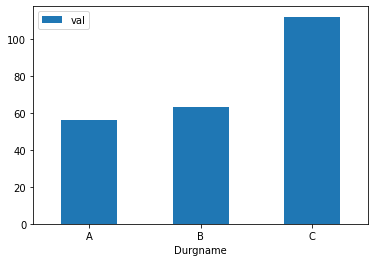

In [160]:
df = pd.DataFrame({'Durgname':['A', 'B', 'C'], 'val':[AA, BB, CC]})
ax = df.plot.bar(x='Durgname', y='val', rot=0)

### Q4

In [198]:
tdf

,PatientID,TreatmentDate,DrugCode
0,2038,2010-01-24,A
1,2038,2010-01-27,A
2,2038,2010-01-30,A
3,2038,2010-02-02,A
4,2038,2010-02-06,A
...,...,...,...
709,9331,2013-11-03,C
710,9331,2013-11-09,C
711,9331,2013-11-15,C
712,9331,2013-11-21,C


In [200]:
tdfgroup=tdf.groupby(['PatientID','DrugCode'])

In [201]:
for k,v in tdfgroup:
    print(k)
    print(v)

(2038, 'A')
   PatientID TreatmentDate DrugCode
0       2038    2010-01-24        A
1       2038    2010-01-27        A
2       2038    2010-01-30        A
3       2038    2010-02-02        A
4       2038    2010-02-06        A
5       2038    2010-02-11        A
6       2038    2010-02-18        A
7       2038    2010-02-20        A
(2120, 'A')
    PatientID TreatmentDate DrugCode
8        2120    2010-01-25        A
10       2120    2010-01-26        A
12       2120    2010-01-27        A
14       2120    2010-01-29        A
16       2120    2010-02-01        A
18       2120    2010-02-04        A
20       2120    2010-02-07        A
22       2120    2010-02-10        A
24       2120    2010-02-14        A
26       2120    2010-02-18        A
28       2120    2010-02-22        A
30       2120    2010-02-27        A
32       2120    2010-03-02        A
(2120, 'B')
    PatientID TreatmentDate DrugCode
9        2120    2010-01-25        B
11       2120    2010-01-26        B
13       21

In [206]:
mindate=tdfgroup['TreatmentDate'].min()

In [204]:
maxdate=tdfgroup['TreatmentDate'].max()